In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 20, 4

In [2]:
ds = xr.open_dataset('deployment0002_RS01SBPS-PC01A-05-ADCPTD102-streamed-adcp_velocity_beam_20160101T000000.587969-20160103T235959.566096.nc')

In [3]:
mean_bin_depths = np.mean(ds.bin_depths.values, axis=0)

In [4]:
# grab values, transpose and flip
north = ds.northward_seawater_velocity.values
north = np.flipud(north.T)

In [5]:
# determine plot bounds
vmin = np.nanpercentile(north, 5)
vmax = np.nanpercentile(north, 95)

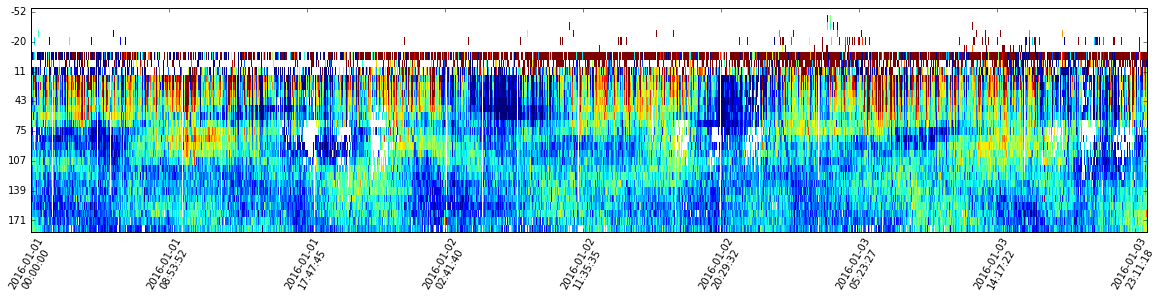

In [6]:
# plot the data
plt.imshow(north, aspect='auto', vmin=vmin, vmax=vmax, interpolation='nearest')
ax = plt.gca()
yticks = ax.set_yticks(np.arange(0, mean_bin_depths.size, 4))
ylabels = ax.set_yticklabels(mean_bin_depths[::-4].astype('int'))
xticks = ax.set_xticks(np.arange(0, ds.time.size, 40000))
xlabels = ax.set_xticklabels([str(_)[:19].replace('T', '\n') for _ in ds.time.values[::40000]], rotation=60)